In [1]:
#importing all the libraries and packages - Obtain
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.style.use('ggplot')

#importing dataset using pandas
data = pd.read_csv('data\\kc_house_data.csv', index_col=0)

In [2]:
#Removed Unnecessary columns - Scrub
data.drop(['date', 'waterfront', 'sqft_above', 'sqft_basement', 'lat', 'long', 'view', 'sqft_living15', 'sqft_lot15', 'waterfront', 'yr_renovated'], axis=1, inplace=True)

In [3]:
#lamba function to remove exponential values - Scrub
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x) 

In [4]:
#Removed duplicates, show completed - Scrub
data.drop_duplicates(inplace=True)
data.isnull().sum()


price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
condition      0
grade          0
yr_built       0
zipcode        0
dtype: int64

In [5]:
#Show current types - Scrub
print(data.dtypes)

price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
condition        int64
grade            int64
yr_built         int64
zipcode          int64
dtype: object


In [6]:
#Create a copy change type by force to integer - Scrub
data1 = data.copy()
data1 = data1.astype("int64", errors='ignore')
data1.head()
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21589 entries, 7129300520 to 1523300157
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   price        21589 non-null  int64
 1   bedrooms     21589 non-null  int64
 2   bathrooms    21589 non-null  int64
 3   sqft_living  21589 non-null  int64
 4   sqft_lot     21589 non-null  int64
 5   floors       21589 non-null  int64
 6   condition    21589 non-null  int64
 7   grade        21589 non-null  int64
 8   yr_built     21589 non-null  int64
 9   zipcode      21589 non-null  int64
dtypes: int64(10)
memory usage: 1.8 MB


In [7]:
#See size of dataset - Scrub
data1.shape

(21589, 10)

In [8]:
#to view statistics - Scrub
data1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
count,21589,21589,21589,21589,21589,21589,21589,21589,21589,21589
mean,"540,308.35",3.37,1.75,"2,080.42","15,103.90",1.45,3.41,7.66,"1,970.99","98,077.95"
std,"367,428.32",0.93,0.73,918.23,"41,419.63",0.55,0.65,1.17,29.37,53.52
min,78000,1,0,370,520,1,1,3,1900,98001
25%,322000,3,1,1430,5042,1,3,7,1951,98033
50%,450000,3,2,1910,7620,1,3,7,1975,98065
75%,645000,4,2,2550,10688,2,4,8,1997,98118
max,7700000,33,8,13540,1651359,3,5,13,2015,98199


In [9]:
population_mean = data.sqft_living.mean()
population_mean

2080.4155356894717

In [10]:
# Take a sample of 50 records
sample = data.sample(n=50, random_state=22)
# Calculate the sample mean
sample_mean = sample.sqft_living.mean()
sample_mean

2211.68

In [11]:
# Find the difference between the sample and population means
err = np.abs(sample_mean - population_mean)
# Divide by the population mean to find a percent error
per_err = err / population_mean
per_err

0.0630953105563239

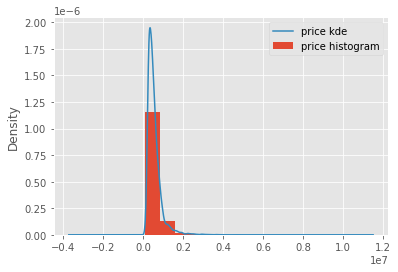

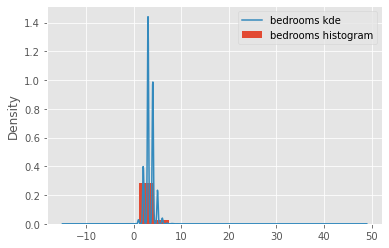

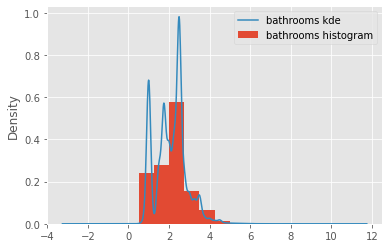

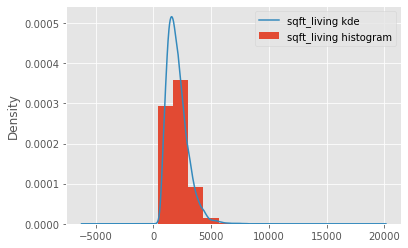

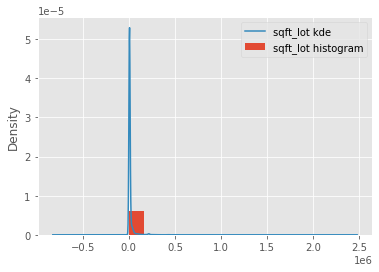

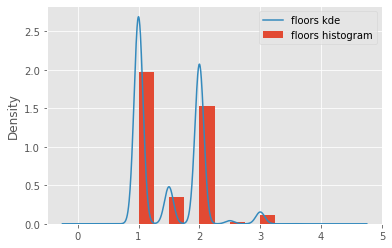

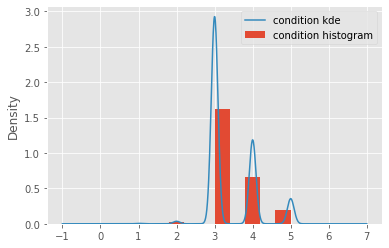

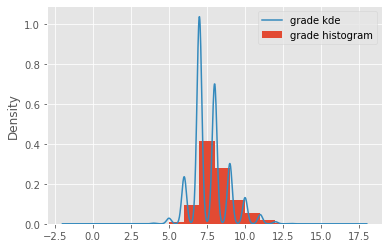

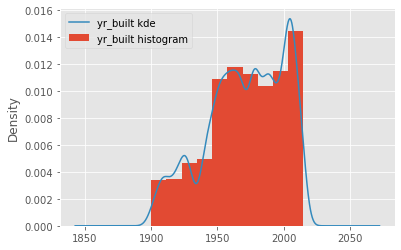

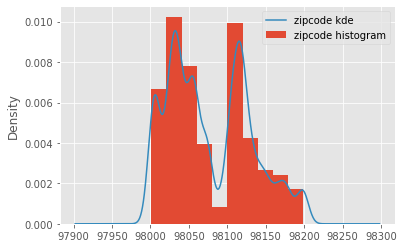

In [13]:
#Plotted KDE - Explore
for column in data:
    data[column].plot.hist(density=True, label = column+' histogram')
    data[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

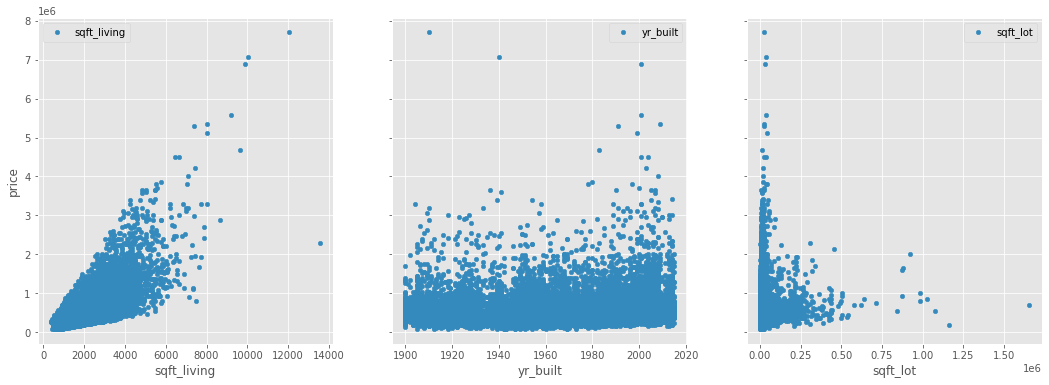

In [14]:
#Created a scatter plot for linearity - Explore 
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['sqft_living', 'yr_built', 'sqft_lot']):
    data.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

In [15]:
# import libraries for OLS - Obtain 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# build the formula - Explore 
f = 'price~sqft_living'
# create a fitted model in one line
model = smf.ols(formula=f, data=data).fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        22:52:55   Log-Likelihood:            -2.9995e+05
No. Observations:               21589   AIC:                         5.999e+05
Df Residuals:                   21587   BIC:                         5.999e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.404e+04   4411.108     -9.984      0.000   -5.27e+04   -3.54e+04
sqft_living   280.8815      1.940    144.801      0.000     277.079     284.684
==============================================================================
Omnibus:                    14794.997   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542159.026
Skew:                           2.819   Prob(JB):                         0.00
Kurtosis:                      26.894   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

   sqft_living
0          370
1        13540
0      59,884.22
1   3,759,093.93
dtype: float64


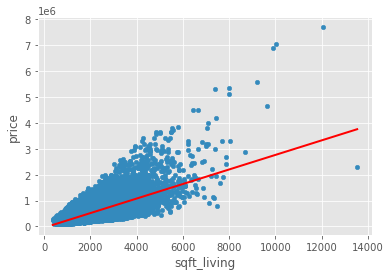

In [17]:
# create a DataFrame with the minimum and maximum values of Sqft_Living - Model 
X_new = pd.DataFrame({'sqft_living': [data.sqft_living.min(), data.sqft_living.max()]})
print(X_new.head())

# make predictions for those x values and store them - Model 
preds = model.predict(X_new)
print (preds)

# first, plot the observed data and the least squares line - Model 
data.plot(kind='scatter', x='sqft_living', y='price')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()
 

In [20]:
#separating independent and dependent variable - Model 
X = data1.iloc[:,1:].values
y = data1.iloc[:,0].values
#splitting dataset into training and testing dataset
#from scikit-learn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [22]:
print(X_test)

[[    2     1   820 ...     6  1953 98118]
 [    4     2  1860 ...     7  1928 98117]
 [    4     1  1780 ...     8  1947 98115]
 ...
 [    2     1  1600 ...     7  1918 98112]
 [    3     1  1010 ...     7  1969 98042]
 [    4     3  3010 ...     9  1999 98112]]
